[{'x': -1079.6496237286772, 'y': 78.0, 'z': -1061.5662111053143}, {'x': -1295.5, 'y': 75.0, 'z': -1263.5}, {'x': -1295.5, 'y': 75.0, 'z': -1263.5}, {'x': -1439.5, 'y': 76.0, 'z': -1439.5}, {'x': -1487.5, 'y': 72.0, 'z': -1423.5}, {'x': -1487.5, 'y': 72.0, 'z': -1423.5}, {'x': -1263.5, 'y': 66.0, 'z': -1183.5}]


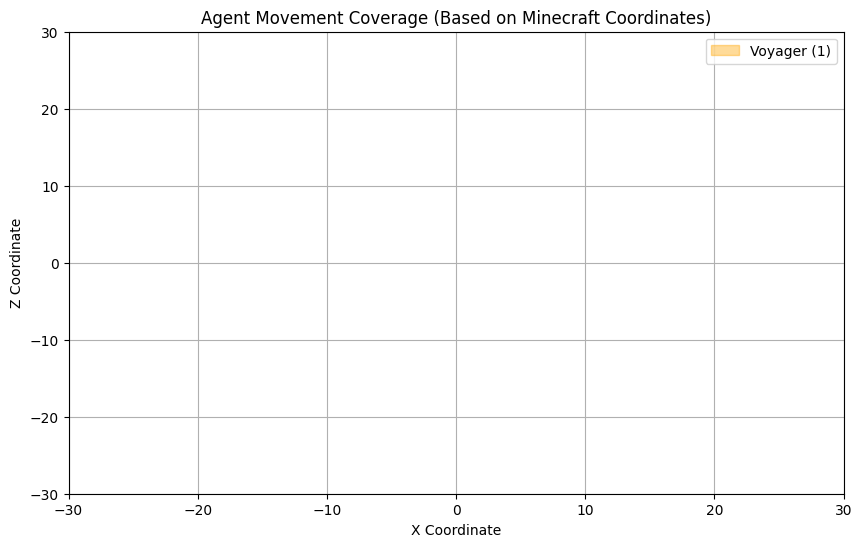

In [17]:
import re
import ast
import math
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import numpy as np

log_file_path = "/Users/daisysong/Desktop/CS194agent/Voyager_OAI/logs/mineflayer/20241110_194312.log"
with open(log_file_path, 'r') as file:
    log_content = file.read()

# Regex to find all 'position' entries and their values
position_pattern = re.compile(r"position:\s*(null|\{.*?\})")

# Extract positions
positions = position_pattern.findall(log_content)

#filter positions
positions = [pos for pos in positions if pos != 'null']

#parse positions into actual dicts

# Function to parse coordinate strings into dictionaries
def parse_position(position_str):
    pattern = r'(\w+):\s*(-?\d+\.?\d*)'
    matches = re.findall(pattern, position_str)
    return {key: float(value) for key, value in matches}

# Parse all positions
parsed_positions = [parse_position(pos) for pos in positions]

# Function to calculate Euclidean distance
def euclidean_distance(p1, p2):
    return math.sqrt((p2['x'] - p1['x'])**2 + (p2['y'] - p1['y'])**2 + (p2['z'] - p1['z'])**2)

# Calculate distances and cumulative distances
distances = []
cumulative_distances = [0]

for i in range(1, len(parsed_positions)):
    d = euclidean_distance(parsed_positions[i - 1], parsed_positions[i])
    distances.append(d)
    cumulative_distances.append(cumulative_distances[-1] + d)

# Plotting the cumulative distance as a time series
# plt.plot(cumulative_distances, marker='o')
# plt.title('Cumulative Distance Over Time')
# plt.xlabel('Time Step')
# plt.ylabel('Cumulative Distance')
# plt.grid(True)
# plt.show()

# for the circle plot visualization
def calculate_center_and_radius(agent_positions):
    print(agent_positions)
    x_coords = [pos['x'] for pos in agent_positions]
    z_coords = [pos['z'] for pos in agent_positions]
    
    #Calculate center (mean of x and z)
    center_x = np.mean(x_coords)
    center_z = np.mean(z_coords)
    
    #Calculate radius (max distance from center)
    distances = [np.sqrt((x - center_x)**2 + (z - center_z)**2) for x, z in zip(x_coords, z_coords)]
    radius = max(distances)
    
    return (center_x, center_z), radius

# Calculate centers and radii for each agent
agents_circles = {} #TODO multiple bots
agent = "Voyager (1)" #TODO need to look into handling multiple bots
center, radius = calculate_center_and_radius(parsed_positions)
agents_circles[agent] = {'center': center, 'radius': radius}

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Define unique colors for each agent
colors = {
    'Voyager (1)': 'orange',
    #TODO add more colors for other bots
}

# Plot circles for each agent
for agent, data in agents_circles.items():
    circle = Circle(data['center'], data['radius'], color=colors[agent], alpha=0.4, label=agent)
    ax.add_patch(circle)

# Set limits based on the data
ax.set_xlim(-30, 30)
ax.set_ylim(-30, 30)

# Add legend and labels
ax.legend()
ax.set_title('Agent Movement Coverage (Based on Minecraft Coordinates)')
ax.set_xlabel('X Coordinate')
ax.set_ylabel('Z Coordinate')
ax.grid(True)

# Display the plot
plt.show()

In [9]:
pip list

Package                                  Version
---------------------------------------- -----------
aiohappyeyeballs                         2.4.3
aiohttp                                  3.10.10
aiosignal                                1.3.1
alembic                                  1.13.3
annotated-types                          0.7.0
anthropic                                0.37.1
anyio                                    4.6.2.post1
appnope                                  0.1.4
asgiref                                  3.8.1
asttokens                                2.4.1
async-timeout                            4.0.3
attrs                                    24.2.0
backoff                                  2.2.1
bcrypt                                   4.2.0
build                                    1.2.2.post1
cachetools                               5.5.0
cchardet                                 2.1.7
certifi                                  2024.8.30
chardet                        